In [1]:
%matplotlib widget

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def wavePlotDemo(wavefunc):
    fig0 = plt.figure(figsize=(8,5))
    ax0 = fig0.add_subplot(111)
    x = np.linspace(-5,20,1000)
    line01, = ax0.plot([],[], color='gray')
    line02, = ax0.plot([],[])
    ax0.set_xlim((-5,20))
    ax0.set_ylim((-5,5))
    ax0.axhline(0, color='k')
    ax0.axvline(0, color='k')
    ax0.set_xlabel('horizontal position')
    ax0.set_ylabel('vertical position')
    
    def plot0(t=0, k=1, v=1): # set initial k and v values here
        # wave1 = wavefunc(x,0,1,.1,1)
        wave2 = wavefunc(x,t,1,k,v)
        # line01.set_data(x,wave1)
        line02.set_data(x,wave2)
        plt.draw()
    interact(plot0, t=(0,10,.05), k=(.1,10,.1), v=(1,10,.1))

def sinWave(x,t,a,k,v, ph=0):
    return a*np.sin(2*np.pi*k*(x-v*t)+ph)

def sinWaveRev(x,t,a,k,v, ph=0):
    return a*np.sin(2*np.pi*k*(x+v*t)+ph)

def sinWaveHeaviside(x,t,a,k,v, ph=0):
    return a*np.sin(2*np.pi*k*(x-v*t)+ph)*np.heaviside(2*np.pi*k*(x-v*t), 1)

def gaussWave(x,t,a,k,v, ph=0):
    return 3*a*np.exp(-(2*np.pi*k*(x-v*t))**2)

def gaussWaveRev(x,t,a,k,v, ph=0):
    return a*np.exp(-(2*np.pi*k*((x-20)+v*t))**2)

def lineWave(x,t,a,k,v):
    return a*k*(x-v*t)+2

def notWave(x,t,a,k,v):
    return a*np.exp(-k*x**2/(v*t))

def notWave2(x,t,a,k,v):
    return a/(k*(x**2-v*t))

In [18]:
def wavePacket(x,t,a,k,v, ph=0):
    n = 100
    j = np.linspace(-n, n, 10*n)
    y = 0
    for i in j:
        a = np.exp(-10*(i-3)**2)
        y = y + a*np.cos(2*np.pi*i*k*(x-v*t)+ph)
    return(y)

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0, step=0.05), FloatSlider(value=1.0, des…

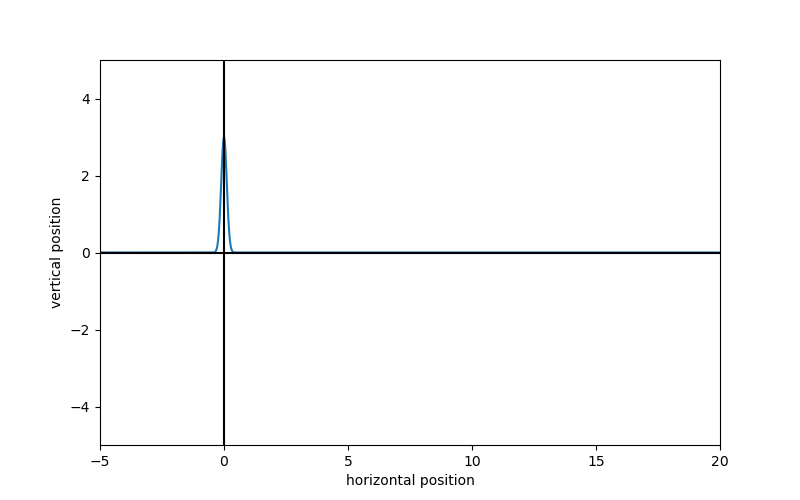

In [3]:
wavePlotDemo(gaussWave)

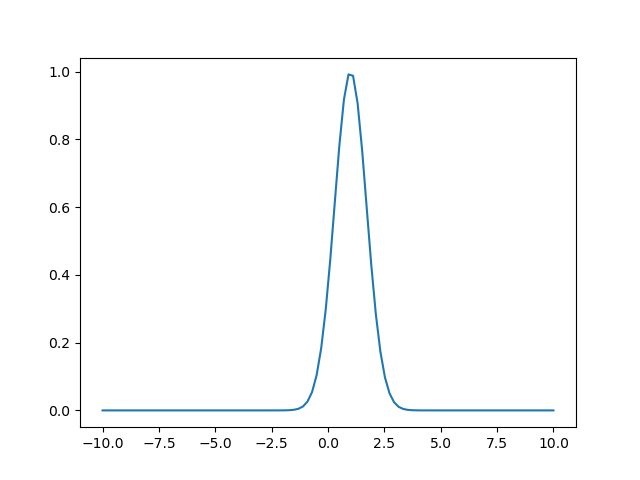

In [9]:
n = 10
j = np.linspace(-n, n, 10*n)
k = np.exp(-(j-1)**2)

fig0,ax0 = plt.subplots()
ax0.plot(j,k)

In [10]:
np.linspace(1 ,101, 51)

array([  1.,   3.,   5.,   7.,   9.,  11.,  13.,  15.,  17.,  19.,  21.,
        23.,  25.,  27.,  29.,  31.,  33.,  35.,  37.,  39.,  41.,  43.,
        45.,  47.,  49.,  51.,  53.,  55.,  57.,  59.,  61.,  63.,  65.,
        67.,  69.,  71.,  73.,  75.,  77.,  79.,  81.,  83.,  85.,  87.,
        89.,  91.,  93.,  95.,  97.,  99., 101.])

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0, step=0.05), FloatSlider(value=1.0, des…

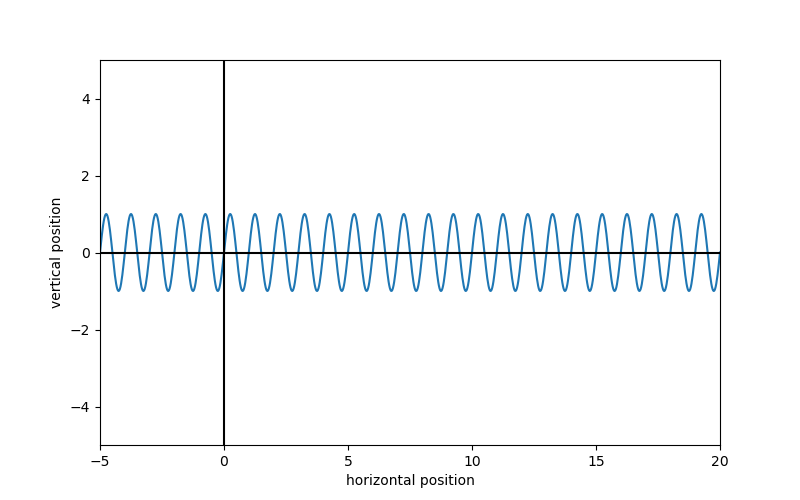

In [4]:
wavePlotDemo(sinWave)

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0, step=0.05), FloatSlider(value=1.0, des…

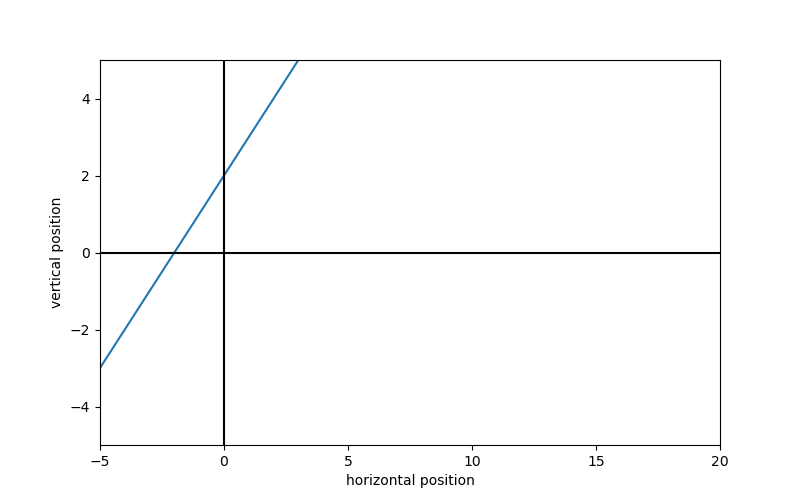

In [5]:
wavePlotDemo(lineWave)

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0, step=0.05), FloatSlider(value=1.0, des…

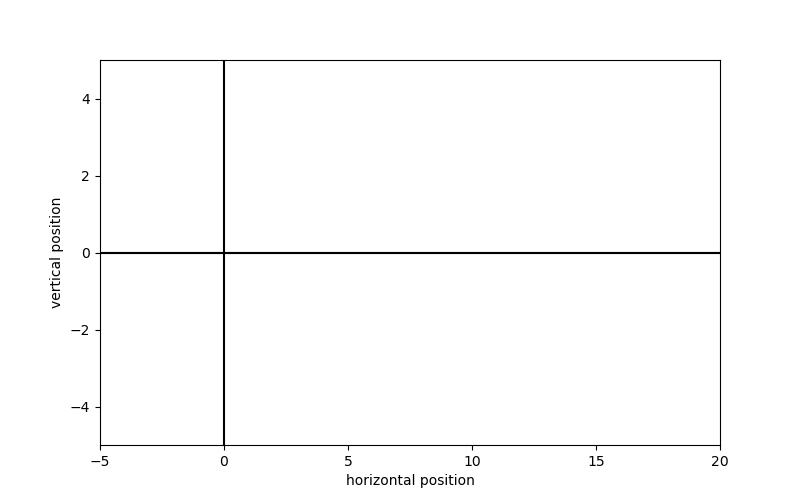

In [6]:
wavePlotDemo(notWave)

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0, step=0.05), FloatSlider(value=1.0, des…

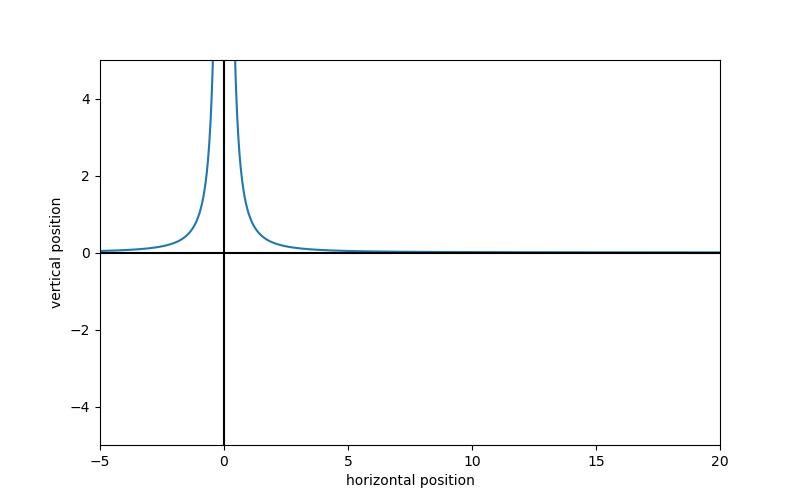

In [7]:
wavePlotDemo(notWave2)

# Superposition

In [11]:
def interfereDemo(func1,func2):
    fig2 = plt.figure(figsize=(8,5))
    ax2 = fig2.add_subplot(111)
    x = np.linspace(0,20,1000)
    line21, = ax2.plot([],[])
    line22, = ax2.plot([],[])
    line23, = ax2.plot([],[])
    ax2.set_ylim((-3,6))
    ax2.set_xlim((0,20))
    ax2.hlines(0,0,20)
    
    def plot2(t=0, a=1, k=.2, ph=0):
        wave1 = func1(x,t,1,.2,1,0)
        wave2 = func2(x,t,a,k,1,ph)
        line21.set_data(x,wave1)
        line22.set_data(x,wave2)
        line23.set_data(x,wave1+wave2+3)
        plt.draw()
    
    interact(plot2, t=(0,20,.05), a=(1,5,.1), k=(.01,1,.01), ph=(0,6.3,.1))

In [12]:
interfereDemo(gaussWave, gaussWaveRev)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='t', max=20.0, step=0.05), FloatSlider(value=1.0, des…

In [13]:
interfereDemo(sinWave, sinWave)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='t', max=20.0, step=0.05), FloatSlider(value=1.0, des…

# Interference

In [14]:
interfereDemo(sinWave, sinWave)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='t', max=20.0, step=0.05), FloatSlider(value=1.0, des…

# Frequency Beating

In [15]:
fig2 = plt.figure(figsize=(8,5))
ax2 = fig2.add_subplot(111)
x = np.linspace(0,20,1000)
line21, = ax2.plot([],[])
line22, = ax2.plot([],[])
line23, = ax2.plot([],[])
ax2.set_ylim((-2,5))
ax2.hlines(0,0,20)

def plot2(t=0, a=1, k=1, ph=0):
    wave1 = sinWave(x,t,1,2,1,0)
    wave2 = sinWave(x,t,a,2*k,1,ph)
    line21.set_data(x,wave1)
    line22.set_data(x,wave2)
    line23.set_data(x,wave1+wave2+3)
    plt.draw()
    
interact(plot2, t=(0,10,.05), a=(1,5,.1), k=(1,1.5,.01), ph=(0,6.3,.1));

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0, step=0.05), FloatSlider(value=1.0, des…

# Standing Waves

In [16]:
fig3 = plt.figure(figsize=(8,5))
ax3 = fig3.add_subplot(111)
x = np.linspace(0,50,500)
line1, = ax3.plot([],[])
line2, = ax3.plot([],[])
line3, = ax3.plot([],[])
ax3.set_ylim((-1.1,5))
ax3.hlines(0,0,50)
ax3.hlines(3,0,50)
ax3.vlines(21.88, -5, 5, color='k')

def wave1(x,t):
    return np.sin(5*t-x)*np.heaviside(-x+5*t,1)

def wave2(x,t):
    return np.sin(-5*t-(x-50))*np.heaviside((x-50)+5*t,1)

def plot3(t=0):
    line1.set_data(x,wave1(x,t))
    line2.set_data(x,wave2(x,t))
    line3.set_data(x,wave1(x,t)+wave2(x,t)+3)
    plt.draw()
    
interact(plot3, t=(0,30,.02));

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='t', max=30.0, step=0.02), Output()), _dom_classes=('…

# Phase velocity vs Group velocity

In [19]:
def phasePlotDemo(wavefunc):
    fig0 = plt.figure(figsize=(8,5))
    ax0 = fig0.add_subplot(111)
    x = np.linspace(-5,20,1000)
    line01, = ax0.plot([],[], color='gray')
    line02, = ax0.plot([],[])
    ax0.set_xlim((-5,20))
    ax0.set_ylim((-5,5))
    ax0.axhline(0, color='k')
    ax0.axvline(0, color='k')
    ax0.set_xlabel('horizontal position')
    ax0.set_ylabel('vertical position')
    
    def plot0(t=0, k=1): # set initial k and v values here
        # wave1 = wavefunc(x,0,1,.1,1)
        wave2 = wavefunc(x,t,1,k)
        # line01.set_data(x,wave1)
        line02.set_data(x,wave2)
        plt.draw()
    interact(plot0, t=(0,10,.05), k=(.1,10,.1))


In [26]:
def wavePacket(x,t,a,k, ph=0):
    n = 100
    j = np.linspace(-n, n, 10*n)
    y = 0
    for i in j:
        index = 1 - 1/i
        v = 1/index
        a = 100/n*np.exp(-10*(i-3)**2)
        y = y + a*np.cos(2*np.pi*i*k*(x-v*t)+ph)
    return(y)

In [27]:
phasePlotDemo(wavePacket)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0, step=0.05), FloatSlider(value=1.0, des…